In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.count()

,0
Date,145460
Location,145460
MinTemp,143975
MaxTemp,144199
Rainfall,142199
Evaporation,82670
Sunshine,75625
WindGustDir,135134
WindGustSpeed,135197
WindDir9am,134894


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df = df.rename(columns={'RainToday':'RainYesterday',
               'RainTomorrow':'RainToday'})

In [10]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [11]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday
64191,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,...,55.0,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes
64192,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,...,50.0,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No
64193,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,...,51.0,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No
64194,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,...,67.0,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No
64195,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,...,51.0,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,2017-06-20,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,...,100.0,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No
80994,2017-06-22,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,...,100.0,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No
80995,2017-06-23,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,...,85.0,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes
80996,2017-06-24,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,...,99.0,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No


In [12]:
def date_to_season(date):
  month = date.month
  if (month==12) or (month==1) or (month==2):
    return 'Summer'
  elif(month==3) or (month==4) or (month==5):
    return 'Autumn'
  elif(month==6) or (month==7) or (month==8):
    return 'Spring'
  elif(month==9) or (month==10) or (month==11):
    return 'Winter'

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df['Season'] = df['Date'].apply(date_to_season)
df

/tmp/ipython-input-391911340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipython-input-391911340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['Date'].apply(date_to_season)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,2017-06-20,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,...,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No,Spring
80994,2017-06-22,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,Spring
80995,2017-06-23,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,...,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes,Spring
80996,2017-06-24,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,...,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No,Spring


In [18]:
X = df.drop(columns='RainToday',axis=1)
y = df['RainToday']

In [19]:
y.value_counts()

,count
RainToday,
No,5766
Yes,1791


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [24]:
numerical_features = X_train.select_dtypes(include='number').columns.tolist()
categorical_features = X_train.select_dtypes(include=['object','category']).columns.tolist()

In [25]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [26]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainYesterday',
 'Season']

In [28]:
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('one hot', OneHotEncoder(handle_unknown='ignore'))])

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer,numerical_features),
        ('cat', categorical_transformer,categorical_features)]
)

In [35]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('Classifier', RandomForestClassifier(random_state=42))
])

In [37]:
param_grid = {
    'Classifier__n_estimators':[50,100],
    'Classifier__max_depth':[None,10,20,50],
    'Claasifier__min_samples_split':[2,5]
}

In [38]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [41]:
param_grid = {
    'Classifier__n_estimators':[50,100],
    'Classifier__max_depth':[None,10,20,50],
    'Classifier__min_samples_split':[2,5]
}
grid_search = GridSearchCV(pipeline,param_grid,cv=cv,scoring='accuracy',verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.8s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.6s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.6s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.6s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=50; total time=   0.5s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=100; total time=   1.1s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=100; total time=   1.1s
[CV] END Classifier__max_depth=None, Classifier__min_samples_split=2, Classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pr...
                                                                         Pipeline(steps=[('one '
                                                                                          'hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainYesterday',
                                                                          'Season'])])),
                                       ('Classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'Classifier__max_depth': [None, 10, 20, 50],
                         'Classifier__min_samples_split': [2, 5],
                         'Classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [42]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'Classifier__max_depth': 20, 'Classifier__min_samples_split': 5, 'Classifier__n_estimators': 100}
0.852605459057072


In [43]:
y_pred = grid_search.predict(X_test)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.86      0.94      0.90      1154
         Yes       0.73      0.51      0.60       358

    accuracy                           0.84      1512
   macro avg       0.80      0.72      0.75      1512
weighted avg       0.83      0.84      0.83      1512



In [45]:
conf_matrix = confusion_matrix(y_test,y_pred)

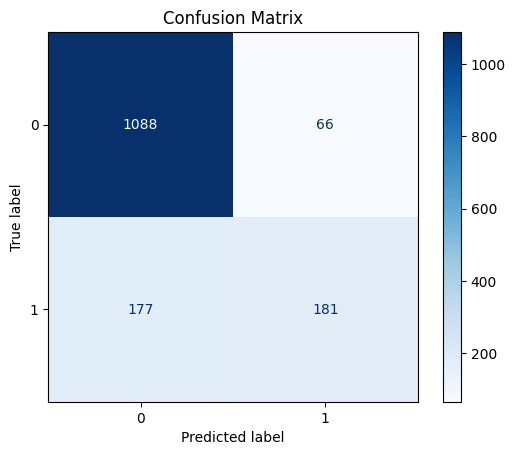

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [49]:
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]

true_positive_rate = TP / (TP + FN)
print(f"True Positive Rate (Recall): {true_positive_rate:.4f}")

True Positive Rate (Recall): 0.5056


Feature Importances (Top 10):
          Feature  Importance
9     Humidity3pm    0.126095
11    Pressure3pm    0.096118
4        Sunshine    0.090609
10    Pressure9am    0.089082
5   WindGustSpeed    0.052242
15        Temp3pm    0.046604
1         MaxTemp    0.038980
0         MinTemp    0.037888
14        Temp9am    0.036973
13       Cloud3pm    0.035899


/tmp/ipython-input-4118886040.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


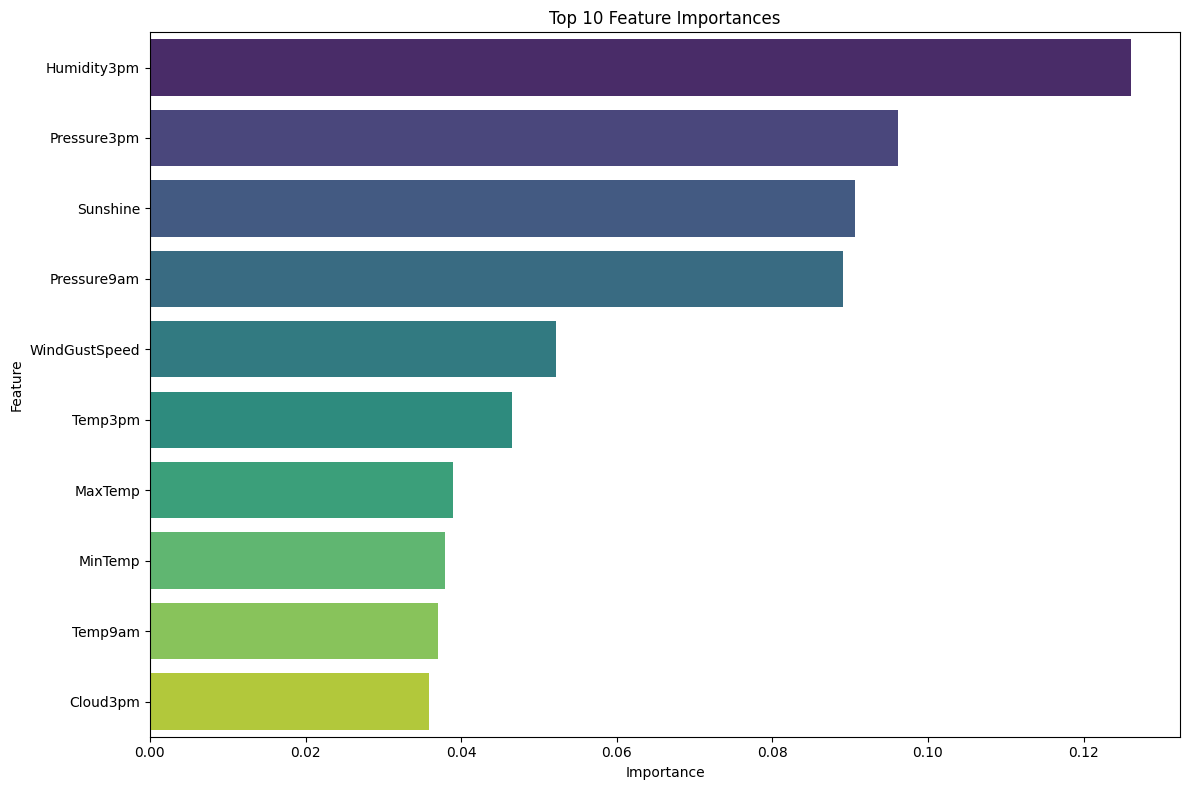

In [50]:
best_model = grid_search.best_estimator_
feature_importances = best_model.named_steps['Classifier'].feature_importances_

# Get feature names from preprocessor
numeric_feature_names = numerical_features
categorical_preprocessor = best_model.named_steps['preprocessor'].named_transformers_['cat']
categorical_feature_names = categorical_preprocessor.named_steps['one hot'].get_feature_names_out(categorical_features)

all_feature_names = list(numeric_feature_names) + list(categorical_feature_names)

importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances (Top 10):")
print(importance_df.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=importance_df.head(10), palette='viridis', legend=False)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [52]:
param_grid_lr = {
    'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'Classifier__solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(pipeline, param_grid_lr, cv=cv, scoring='accuracy', verbose=2)
grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..Classifier__C=0.001, Classifier__solver=liblinear; total time=   0.1s
[CV] END ..Classifier__C=0.001, Classifier__solver=liblinear; total time=   0.0s
[CV] END ..Classifier__C=0.001, Classifier__solver=liblinear; total time=   0.0s
[CV] END ..Classifier__C=0.001, Classifier__solver=liblinear; total time=   0.0s
[CV] END ..Classifier__C=0.001, Classifier__solver=liblinear; total time=   0.1s
[CV] END .......Classifier__C=0.001, Classifier__solver=saga; total time=   0.1s
[CV] END .......Classifier__C=0.001, Classifier__solver=saga; total time=   0.1s
[CV] END .......Classifier__C=0.001, Classifier__solver=saga; total time=   0.1s
[CV] END .......Classifier__C=0.001, Classifier__solver=saga; total time=   0.1s
[CV] END .......Classifier__C=0.001, Classifier__solver=saga; total time=   0.1s
[CV] END ...Classifier__C=0.01, Classifier__solver=liblinear; total time=   0.1s
[CV] END ...Classifier__C=0.01, Classifier__solv

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=0.1, Classifier__solver=saga; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=0.1, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=0.1, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=0.1, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=0.1, Classifier__solver=saga; total time=   0.7s
[CV] END ......Classifier__C=1, Classifier__solver=liblinear; total time=   0.1s
[CV] END ......Classifier__C=1, Classifier__solver=liblinear; total time=   0.1s
[CV] END ......Classifier__C=1, Classifier__solver=liblinear; total time=   0.1s
[CV] END ......Classifier__C=1, Classifier__solver=liblinear; total time=   0.1s
[CV] END ......Classifier__C=1, Classifier__solver=liblinear; total time=   0.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........Classifier__C=1, Classifier__solver=saga; total time=   1.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........Classifier__C=1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........Classifier__C=1, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........Classifier__C=1, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........Classifier__C=1, Classifier__solver=saga; total time=   0.7s
[CV] END .....Classifier__C=10, Classifier__solver=liblinear; total time=   0.1s
[CV] END .....Classifier__C=10, Classifier__solver=liblinear; total time=   0.1s
[CV] END .....Classifier__C=10, Classifier__solver=liblinear; total time=   0.1s
[CV] END .....Classifier__C=10, Classifier__solver=liblinear; total time=   0.1s
[CV] END .....Classifier__C=10, Classifier__solver=liblinear; total time=   0.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........Classifier__C=10, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........Classifier__C=10, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........Classifier__C=10, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........Classifier__C=10, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........Classifier__C=10, Classifier__solver=saga; total time=   0.8s
[CV] END ....Classifier__C=100, Classifier__solver=liblinear; total time=   0.1s
[CV] END ....Classifier__C=100, Classifier__solver=liblinear; total time=   0.1s
[CV] END ....Classifier__C=100, Classifier__solver=liblinear; total time=   0.1s
[CV] END ....Classifier__C=100, Classifier__solver=liblinear; total time=   0.1s
[CV] END ....Classifier__C=100, Classifier__solver=liblinear; total time=   0.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=100, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=100, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=100, Classifier__solver=saga; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=100, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=100, Classifier__solver=saga; total time=   1.3s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pr...
                                                                          'Temp3pm']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('one '
                                                                                          'hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainYesterday',
                                                                          'Season'])])),
                                       ('Classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'Classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'Classifier__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=2)

In [53]:
print(grid_search_lr.best_params_)
print(grid_search_lr.best_score_)

{'Classifier__C': 0.1, 'Classifier__solver': 'saga'}
0.8335814722911496


In [55]:
# Make predictions with the LogisticRegression model
y_pred = grid_search_lr.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..Classifier__C=0.001, Classifier__solver=liblinear; total time=   0.2s
[CV] END ..Classifier__C=0.001, Classifier__solver=liblinear; total time=   0.1s
[CV] END ..Classifier__C=0.001, Classifier__solver=liblinear; total time=   0.1s
[CV] END ..Classifier__C=0.001, Classifier__solver=liblinear; total time=   0.1s
[CV] END ..Classifier__C=0.001, Classifier__solver=liblinear; total time=   0.1s
[CV] END .......Classifier__C=0.001, Classifier__solver=saga; total time=   0.3s
[CV] END .......Classifier__C=0.001, Classifier__solver=saga; total time=   0.3s
[CV] END .......Classifier__C=0.001, Classifier__solver=saga; total time=   0.3s
[CV] END .......Classifier__C=0.001, Classifier__solver=saga; total time=   0.3s
[CV] END .......Classifier__C=0.001, Classifier__solver=saga; total time=   0.3s
[CV] END ...Classifier__C=0.01, Classifier__solver=liblinear; total time=   0.1s
[CV] END ...Classifier__C=0.01, Classifier__solv

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=0.1, Classifier__solver=saga; total time=   1.5s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=0.1, Classifier__solver=saga; total time=   1.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=0.1, Classifier__solver=saga; total time=   2.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=0.1, Classifier__solver=saga; total time=   2.0s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=0.1, Classifier__solver=saga; total time=   1.4s
[CV] END ......Classifier__C=1, Classifier__solver=liblinear; total time=   0.1s
[CV] END ......Classifier__C=1, Classifier__solver=liblinear; total time=   0.1s
[CV] END ......Classifier__C=1, Classifier__solver=liblinear; total time=   0.1s
[CV] END ......Classifier__C=1, Classifier__solver=liblinear; total time=   0.1s
[CV] END ......Classifier__C=1, Classifier__solver=liblinear; total time=   0.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........Classifier__C=1, Classifier__solver=saga; total time=   1.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........Classifier__C=1, Classifier__solver=saga; total time=   1.9s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........Classifier__C=1, Classifier__solver=saga; total time=   1.4s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........Classifier__C=1, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...........Classifier__C=1, Classifier__solver=saga; total time=   1.4s
[CV] END .....Classifier__C=10, Classifier__solver=liblinear; total time=   0.2s
[CV] END .....Classifier__C=10, Classifier__solver=liblinear; total time=   0.2s
[CV] END .....Classifier__C=10, Classifier__solver=liblinear; total time=   0.2s
[CV] END .....Classifier__C=10, Classifier__solver=liblinear; total time=   0.1s
[CV] END .....Classifier__C=10, Classifier__solver=liblinear; total time=   0.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........Classifier__C=10, Classifier__solver=saga; total time=   2.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........Classifier__C=10, Classifier__solver=saga; total time=   1.2s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........Classifier__C=10, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........Classifier__C=10, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........Classifier__C=10, Classifier__solver=saga; total time=   0.7s
[CV] END ....Classifier__C=100, Classifier__solver=liblinear; total time=   0.1s
[CV] END ....Classifier__C=100, Classifier__solver=liblinear; total time=   0.1s
[CV] END ....Classifier__C=100, Classifier__solver=liblinear; total time=   0.1s
[CV] END ....Classifier__C=100, Classifier__solver=liblinear; total time=   0.1s
[CV] END ....Classifier__C=100, Classifier__solver=liblinear; total time=   0.1s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=100, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=100, Classifier__solver=saga; total time=   0.8s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=100, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........Classifier__C=100, Classifier__solver=saga; total time=   0.7s
[CV] END .........Classifier__C=100, Classifier__solver=saga; total time=   0.7s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

          No       0.86      0.93      0.89      1154
         Yes       0.69      0.51      0.59       358

    accuracy                           0.83      1512
   macro avg       0.77      0.72      0.74      1512
weighted avg       0.82      0.83      0.82      1512



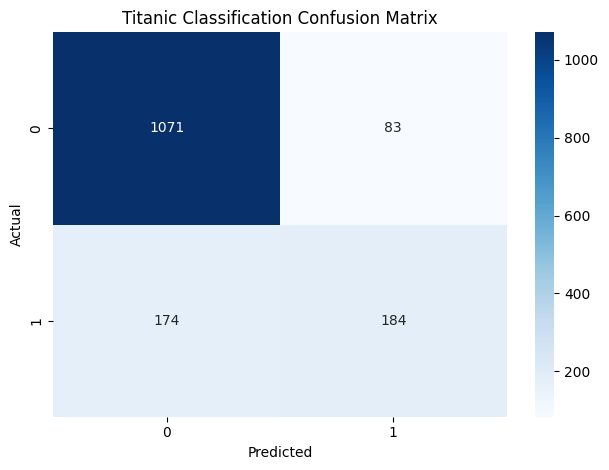

In [56]:
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()